# Project

In [1]:
# Mall Customers Segmentation using K-Means clustering

# Introduction

In [2]:
# The dataset used is of Mall customers which has 200 samples with there features; 
# CustomerID genre,age, annual income and spending score.

# Problem Domain

In [3]:
# we have Csv file of Mall_Customers dataset and now we see There are 5 features in dataset.
# one feature is in string form and remaining are in numerical form.
# All features are independent of each other so Unsupervised Machine Learning is best for making model.

# Solution Domain

In [4]:
# For Mall Customer dataset K-means Clustering Algorithm is used.
# Since this algorithm works on forming clusters with similar
# ,where data points within each cluster are more similar to each other than to those in other clusters.
# it's main aim is to minimize the variance within each cluster.
# The term ‘K’ is a number,
# "For example if K = 2 it refers to 'two' clusters".

# Two points are assigned as centroids.
# (For every point, the distance is measured from both the centroids
# ,and whichever distance is less, that point is assigned to that centroid)

In [5]:
# Simple and easy to implement: The k-means algorithm is easy to understand and implement
#                              ,making it a popular choice for clustering tasks.

# Fast and efficient: K-means is computationally efficient and can handle large datasets with high dimensionality.

# Scalability: K-means can handle large datasets with a large number of data points
#             and can be easily scaled to handle even larger datasets.

# Flexibility: K-means can be easily adapted to different applications and can be used with different distance metrics
#              and initialization methods.

# Technology Used

In [6]:
# We used Jupyter Notebook for Iris dataset algorithm and also used diffent types of library from python such as numpy, pandas 
# ,matplotlib, seaborn and Scikit-Learn. 

# Existing Solution

# 1.Importing and preperation of data

# Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load dataset

In [8]:
# Import dataset
customer_data=pd.read_csv("D:/Mall_Customers.csv")
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Summarize the Dataset

In [9]:
# It gives how many instances (rows) and how many attributes (columns) in the dataset
customer_data.shape

(200, 5)

In [10]:
# It gives first 5 rows data from dataset
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# It gives last 5 rows data from dataset
customer_data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [12]:
# It shows the information of dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
# It shows Null values in dataset
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
# It describe the dataset
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Dividing the Dataset

In [15]:
X=customer_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25036.417604033984,
 21916.794789843727,
 20072.07093940401]

# Data Visualization

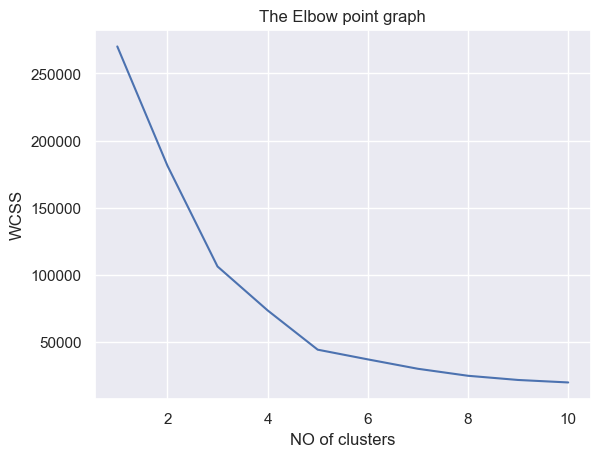

In [18]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow point graph")
plt.xlabel("NO of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
Y=kmeans.fit_predict(X)
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

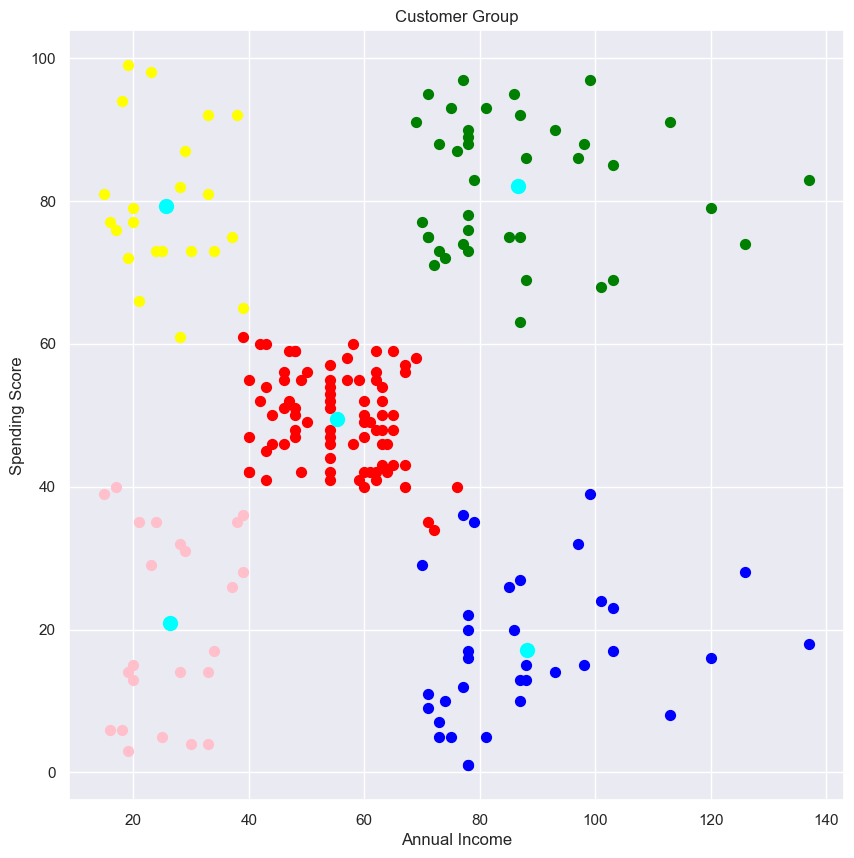

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c="red",label="cluster_1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c="green",label="cluster_2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c="blue",label="cluster_3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c="pink",label="cluster_4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c="yellow",label="cluster_5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="cyan",label="Centroids")
plt.title("Customer Group")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# Conclusion

In [21]:
# In conclusion, K-means clustering is a powerful unsupervised machine learning algorithm for grouping unlabeled datasets.
# Its objective is to divide data into clusters, making similar data points part of the same group.
# The algorithm initializes cluster centroids and iteratively assigns data points to the nearest centroid
# , updating centroids based on the mean of points in each cluster.

# Real life example:-

# Customer segmentation in marketing, where k-means groups customers based on purchasing behavior
# ,allowing businesses to tailor marketing strategies for different segments.

# Academic Performance:-Based on the scores, students are categorized into grades like A, B, or C. 

# Diagnostic systems:-The medical profession uses k-means in creating smarter medical decision support systems
# ,especially in the treatment of liver ailments.

# Search engines:-Clustering forms a backbone of search engines. When a search is performed
# ,the search results need to be grouped, and the search engines very often use clustering to do this. 

# Wireless sensor networks:-The clustering algorithm plays the role of finding the cluster heads
# ,which collect all the data in its respective cluster.